In [79]:
import pandas as pd
data = pd.read_csv('flight_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'flight_data.csv'

In [83]:
data.shape

(959, 30)

In [63]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

data.columns

Index(['customer_id', 'days_since_last_flight', 'customer_age',
       'flight_type_economy', 'flight_type_business',
       'flight_type_first_class', 'flight_type_international',
       'flight_type_domestic', 'flight_type_charter', 'flight_type_cargo',
       'flight_type_private', 'flight_type_other', 'flight_start_date',
       'previous_cancellations', 'cancellation_reason_weather',
       'cancellation_reason_technical', 'cancellation_reason_overbooking',
       'cancellation_reason_airline', 'cancellation_reason_customer',
       'cancellation_reason_other', 'gender_male', 'number_of_bookings',
       'number_of_flights', 'frequent_flyer', 'customer_flight_frequency',
       'first_flight_date', 'ethnicity_native', 'ethnicity_asian',
       'ethnicity_black', 'ethnicity_multi_racial'],
      dtype='object')

In [71]:
#Check missing data 
df = pd.DataFrame(data)

# Calculate the percentage of missing values in each column
missing_percentages = df.isna().mean() * 100

# Display the missing percentages
print("Missing percentages in each column:")
print(missing_percentages)

Missing percentages in each column:
customer_id                        0.0
days_since_last_flight             0.0
customer_age                       0.0
flight_type_economy                0.0
flight_type_business               0.0
flight_type_first_class            0.0
flight_type_international          0.0
flight_type_domestic               0.0
flight_type_charter                0.0
flight_type_cargo                  0.0
flight_type_private                0.0
flight_type_other                  0.0
flight_start_date                  0.0
previous_cancellations             0.0
cancellation_reason_weather        0.0
cancellation_reason_technical      0.0
cancellation_reason_overbooking    0.0
cancellation_reason_airline        0.0
cancellation_reason_customer       0.0
cancellation_reason_other          0.0
gender_male                        0.0
number_of_bookings                 0.0
number_of_flights                  0.0
frequent_flyer                     0.0
customer_flight_frequency   

In [288]:
#standardize continuous variables 
from sklearn.preprocessing import StandardScaler

# Select the columns to standardize
columns_to_standardize = ['days_since_last_flight', 'customer_age', 'number_of_bookings', 'number_of_flights']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])



In [95]:

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["Variable"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif


# Remove non-predictor columns
X = data.drop(columns=['customer_id', 'flight_start_date', 'first_flight_date', 'customer_flight_frequency'])

# Check VIF
vif = calculate_vif(X)
print(vif)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the target outcome
y = data['customer_flight_frequency']


                           Variable        VIF
0            days_since_last_flight   4.562930
1                      customer_age   4.071884
2               flight_type_economy   3.692058
3              flight_type_business   1.787050
4           flight_type_first_class  10.619826
5         flight_type_international   1.529030
6              flight_type_domestic   1.545717
7               flight_type_charter   5.725493
8                 flight_type_cargo   1.348940
9               flight_type_private   1.897435
10                flight_type_other   1.108934
11           previous_cancellations   1.912626
12      cancellation_reason_weather   4.357998
13    cancellation_reason_technical  10.197452
14  cancellation_reason_overbooking   1.066733
15      cancellation_reason_airline   1.071169
16     cancellation_reason_customer   2.602101
17        cancellation_reason_other   5.459800
18                      gender_male   2.064492
19               number_of_bookings   5.674197
20           

In [ ]:
# Fit the linear regression model
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())


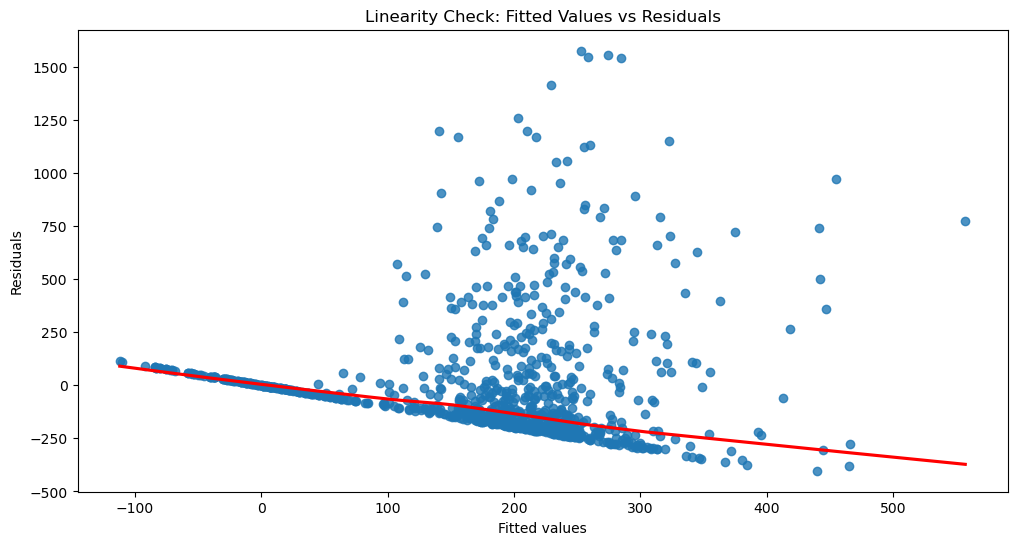

Durbin-Watson statistic: 1.8865817504419982


<Figure size 1200x600 with 0 Axes>

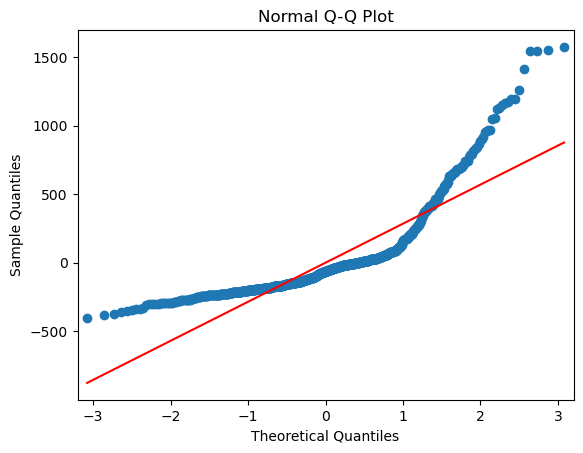

Shapiro-Wilk test: ShapiroResult(statistic=0.7558761193464721, pvalue=2.2200714663028667e-35)
Kolmogorov-Smirnov test: KstestResult(statistic=0.6540493783131309, pvalue=0.0, statistic_location=-3.1561173791262576, statistic_sign=1)


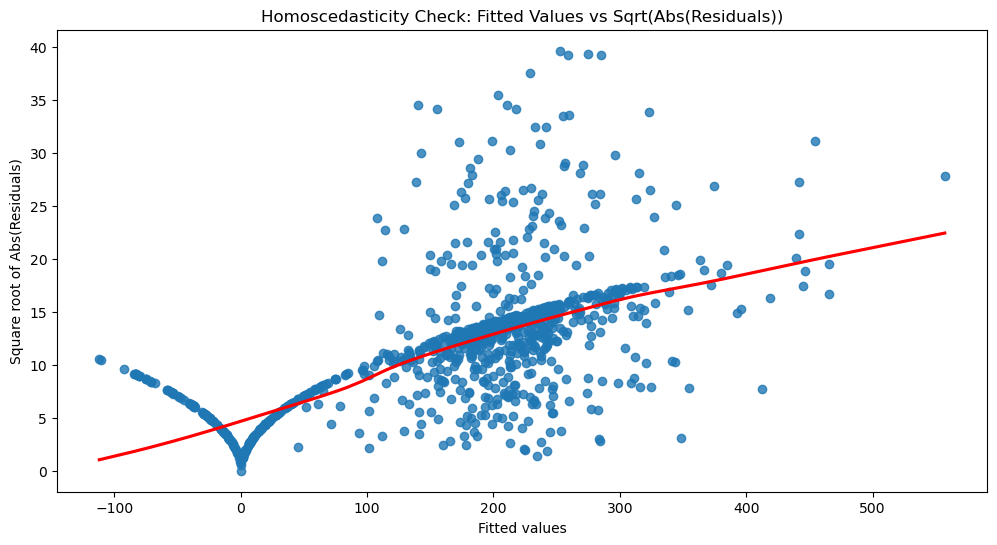

Levene’s test p-value: 6.2766661079693956e-34


In [99]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, kstest, levene


# Assumption Checks

# 1. Linearity
plt.figure(figsize=(12, 6))
sns.regplot(x=result.fittedvalues, y=result.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Linearity Check: Fitted Values vs Residuals')
plt.show()

# 2. Independence of errors
# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(result.resid)
print(f'Durbin-Watson statistic: {dw}')

# 3. Normality of errors
plt.figure(figsize=(12, 6))
qqplot(result.resid, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

# Shapiro-Wilk test
shapiro_test = shapiro(result.resid)
print(f'Shapiro-Wilk test: {shapiro_test}')

# Kolmogorov-Smirnov test
ks_test = kstest(result.resid, 'norm')
print(f'Kolmogorov-Smirnov test: {ks_test}')

# 4. Homoscedasticity 
plt.figure(figsize=(12, 6))
sns.regplot(x=result.fittedvalues, y=np.sqrt(np.abs(result.resid)), lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Square root of Abs(Residuals)')
plt.title('Homoscedasticity Check: Fitted Values vs Sqrt(Abs(Residuals))')
plt.show()

# Levene's test for homogeneity of variance
_, pvalue = levene(result.fittedvalues, result.resid)
print(f'Levene’s test p-value: {pvalue}')



/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                           Variable        VIF
0            days_since_last_flight   4.562930
1                      customer_age   4.071884
2               flight_type_economy   3.692058
3              flight_type_business   1.787050
4           flight_type_first_class  10.619826
5         flight_type_international   1.529030
6              flight_type_domestic   1.545717
7               flight_type_charter   5.725493
8                 flight_type_cargo   1.348940
9               flight_type_private   1.897435
10                flight_type_other   1.108934
11           previous_cancellations   1.912626
12      cancellation_reason_weather   4.357998
13    cancellation_reason_technical  10.197452
14  cancellation_reason_overbooking   1.066733
15      cancellation_reason_airline   1.071169
16     cancellation_reason_customer   2.602101
17        cancellation_reason_other   5.459800
18                      gender_male   2.064492
19               number_of_bookings   5.674197
20           

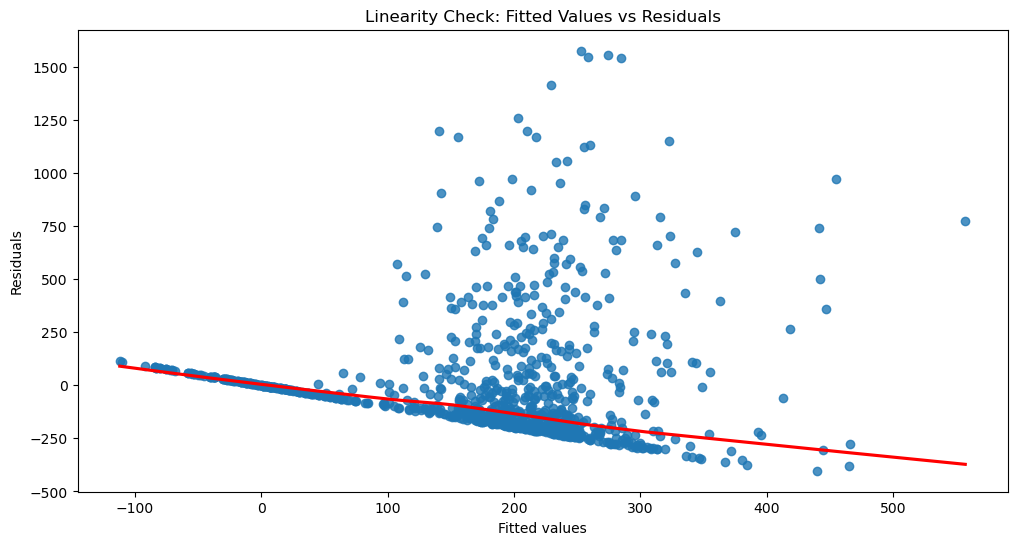

Durbin-Watson statistic: 1.8865817504419982


<Figure size 1200x600 with 0 Axes>

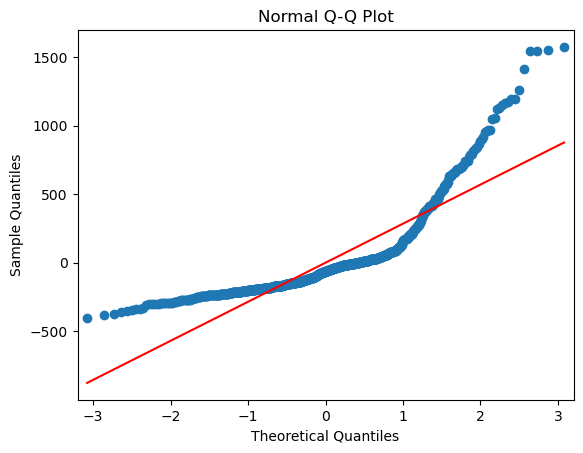

Shapiro-Wilk test: ShapiroResult(statistic=0.7558761193464721, pvalue=2.2200714663028667e-35)
Kolmogorov-Smirnov test: KstestResult(statistic=0.6540493783131309, pvalue=0.0, statistic_location=-3.1561173791262576, statistic_sign=1)


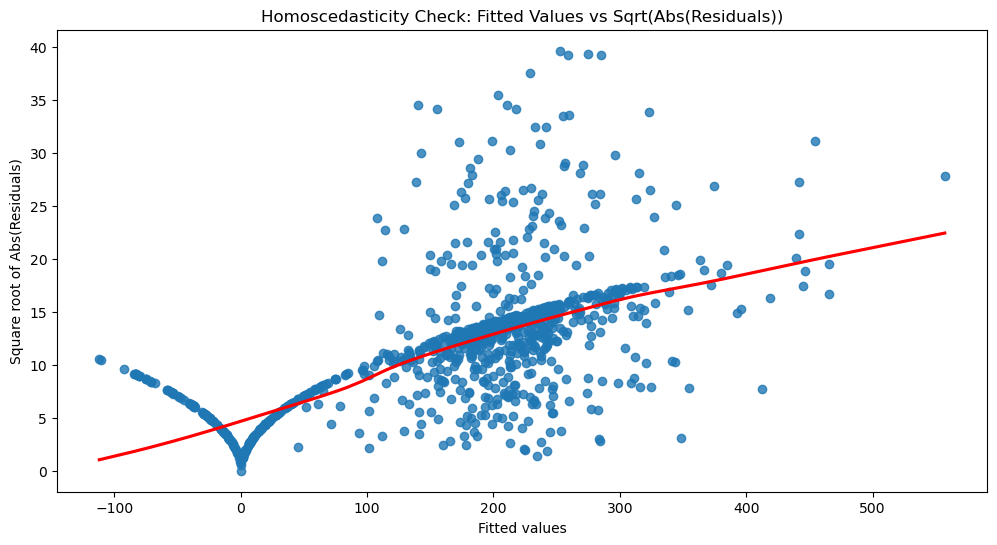

Levene’s test p-value: 6.2766661079693956e-34


In [107]:

from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standard scaling and LassoCV
pipeline = make_pipeline(
    StandardScaler(),
    LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
)

# Fit the model
pipeline.fit(X_train, y_train)

# Get the best alpha value
lasso = pipeline.named_steps['lassocv']
print(f"Best alpha (lambda) value: {lasso.alpha_}")


Best alpha (lambda) value: 11.28471657029729


In [109]:
# Print the coefficients
coefficients = lasso.coef_
print("Coefficients of the Lasso model:")
print(coefficients)



Coefficients of the Lasso model:
[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.53808841e-02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.47509410e+01  2.07925938e+00  0.00000000e+00
 -0.00000000e+00  2.17577891e+01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.51457129e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  7.48430314e+01 -0.00000000e+00
  0.00000000e+00  1.16694412e+01 -1.74297774e+00]


In [111]:
# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
r2_score = pipeline.score(X_test, y_test)
print(f"R^2 score on the test set: {r2_score}")

# Optional: Print out the feature names with their corresponding coefficients
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=False))


R^2 score on the test set: 0.04220703728221209
                            Feature  Coefficient
22                   frequent_flyer    74.843031
13      cancellation_reason_weather    21.757789
9                 flight_type_cargo    14.750941
25                  ethnicity_black    11.669441
10              flight_type_private     2.079259
14    cancellation_reason_technical    -0.000000
24                  ethnicity_asian     0.000000
23                 ethnicity_native    -0.000000
21                number_of_flights     0.000000
20               number_of_bookings    -0.000000
19                      gender_male    -0.000000
18        cancellation_reason_other    -0.000000
16      cancellation_reason_airline    -0.000000
15  cancellation_reason_overbooking    -0.000000
0                             const     0.000000
1            days_since_last_flight    -0.000000
12           previous_cancellations    -0.000000
11                flight_type_other     0.000000
8               flight

Feature Importance:
                            Feature  Importance
22                   frequent_flyer   74.843031
13      cancellation_reason_weather   21.757789
9                 flight_type_cargo   14.750941
25                  ethnicity_black   11.669441
17     cancellation_reason_customer   -2.514571
10              flight_type_private    2.079259
26           ethnicity_multi_racial   -1.742978
3               flight_type_economy   -0.025381
7              flight_type_domestic   -0.000000
8               flight_type_charter    0.000000
2                      customer_age   -0.000000
24                  ethnicity_asian    0.000000
23                 ethnicity_native   -0.000000
21                number_of_flights    0.000000
20               number_of_bookings   -0.000000
19                      gender_male   -0.000000
18        cancellation_reason_other   -0.000000
4              flight_type_business   -0.000000
16      cancellation_reason_airline   -0.000000
15  cancellation_rea

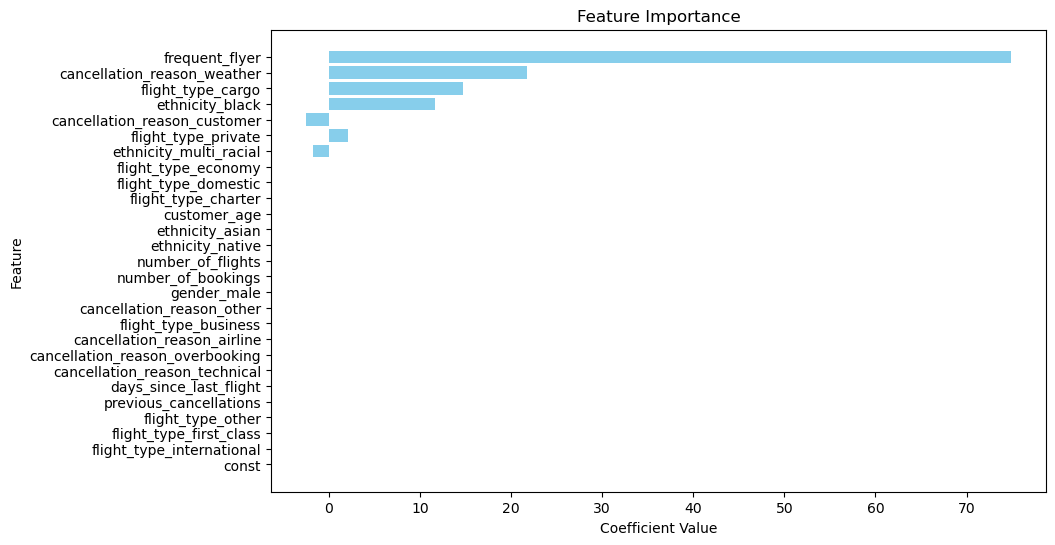

In [117]:
# Feature importance

# Get the coefficients of the model
coefficients = lasso.coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
}).sort_values(by='Importance', key=abs, ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()


In [127]:
#Ridge 

from sklearn.linear_model import RidgeCV


# Create a pipeline with standard scaling and RidgeCV
pipeline = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=np.logspace(-6, 6, 100), cv=5) 
)

# Fit the model
pipeline.fit(X_train, y_train)

# Get the best alpha value
ridge = pipeline.named_steps['ridgecv']
print(f"Best alpha (lambda) value: {ridge.alpha_}")

# Print the coefficients
coefficients = ridge.coef_
print("Coefficients of the Ridge model:")
print(coefficients)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
r2_score = pipeline.score(X_test, y_test)
print(f"R^2 score on the test set: {r2_score}")

# Optional: Print out the feature names with their corresponding coefficients
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=False))


Best alpha (lambda) value: 174.7528400007683
Coefficients of the Ridge model:
[  0.          -5.76067641  -2.49269446  -9.18212226  -4.45436863
  11.92197006  -8.8996231   -3.58223785   5.78016732  20.25087839
  16.26585458   5.66014659  -9.52009219  23.7246246  -16.85936751
  -1.37410671  -1.60971549 -19.27712833 -16.30959701  -5.38317641
  -8.23988368  17.50882795  68.81650181  -2.06452703   0.
  16.27133017 -10.04017632]
R^2 score on the test set: 0.017676993512320327
                            Feature  Coefficient
22                   frequent_flyer    68.816502
13      cancellation_reason_weather    23.724625
9                 flight_type_cargo    20.250878
21                number_of_flights    17.508828
25                  ethnicity_black    16.271330
10              flight_type_private    16.265855
5           flight_type_first_class    11.921970
8               flight_type_charter     5.780167
11                flight_type_other     5.660147
24                  ethnicity_asia

Feature Importance:
                            Feature  Importance
22                   frequent_flyer   68.816502
13      cancellation_reason_weather   23.724625
9                 flight_type_cargo   20.250878
17     cancellation_reason_customer  -19.277128
21                number_of_flights   17.508828
14    cancellation_reason_technical  -16.859368
18        cancellation_reason_other  -16.309597
25                  ethnicity_black   16.271330
10              flight_type_private   16.265855
5           flight_type_first_class   11.921970
26           ethnicity_multi_racial  -10.040176
12           previous_cancellations   -9.520092
3               flight_type_economy   -9.182122
6         flight_type_international   -8.899623
20               number_of_bookings   -8.239884
8               flight_type_charter    5.780167
1            days_since_last_flight   -5.760676
11                flight_type_other    5.660147
19                      gender_male   -5.383176
4              fligh

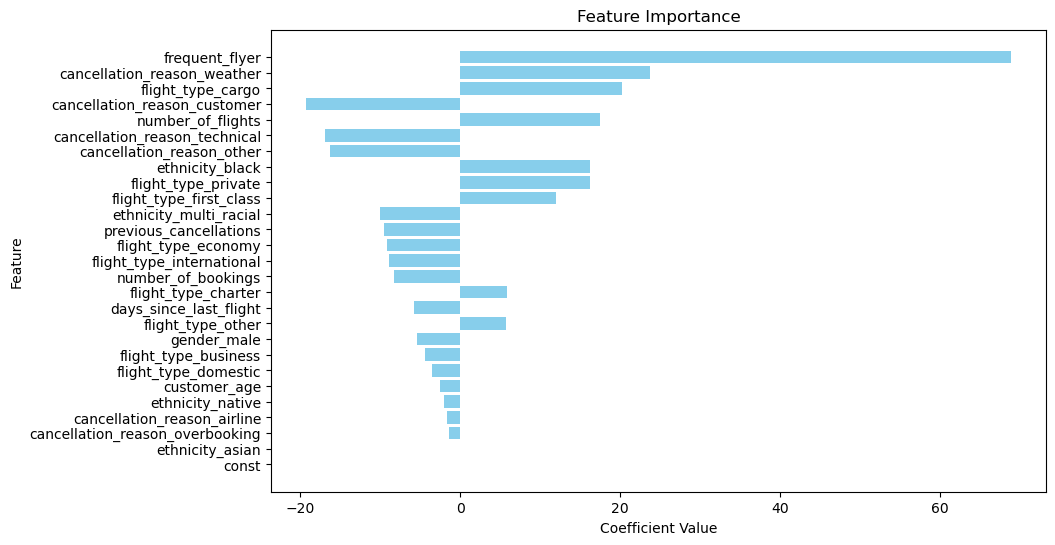

In [131]:


# Feature importance

# Get the coefficients of the model
coefficients = ridge.coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
}).sort_values(by='Importance', key=abs, ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()


In [133]:

from sklearn.linear_model import ElasticNetCV

# Create a pipeline with standard scaling and ElasticNetCV
pipeline = make_pipeline(
    StandardScaler(),
    ElasticNetCV(cv=5, random_state=42)  
)

# Fit the model
pipeline.fit(X_train, y_train)

# Get the best alpha and l1_ratio values
elastic_net = pipeline.named_steps['elasticnetcv']
print(f"Best alpha value: {elastic_net.alpha_}")
print(f"Best l1_ratio value: {elastic_net.l1_ratio_}")

# Print the coefficients
coefficients = elastic_net.coef_
print("Coefficients of the Elastic Net model:")
print(coefficients)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
r2_score = pipeline.score(X_test, y_test)
print(f"R^2 score on the test set: {r2_score}")

#Print out the feature names with their corresponding coefficients
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=False))


Best alpha value: 0.5213831781212868
Best l1_ratio value: 0.5
Coefficients of the Elastic Net model:
[  0.          -4.445658    -1.78715453  -8.65498608  -4.14961062
   9.90013782  -8.5951349   -3.57972633   5.40420202  19.62638306
  15.42502637   5.47631567  -8.91801225  23.25164326 -14.12071815
  -1.09787846  -1.29026523 -17.9063387  -14.6739546   -5.05110213
  -7.24047385  16.00463761  66.75293034  -1.88426982   0.
  15.62113576  -9.60994308]
R^2 score on the test set: 0.019616740755564188
                            Feature  Coefficient
22                   frequent_flyer    66.752930
13      cancellation_reason_weather    23.251643
9                 flight_type_cargo    19.626383
21                number_of_flights    16.004638
25                  ethnicity_black    15.621136
10              flight_type_private    15.425026
5           flight_type_first_class     9.900138
11                flight_type_other     5.476316
8               flight_type_charter     5.404202
24         

Feature Importance:
                            Feature  Importance
22                   frequent_flyer   66.752930
13      cancellation_reason_weather   23.251643
9                 flight_type_cargo   19.626383
17     cancellation_reason_customer  -17.906339
21                number_of_flights   16.004638
25                  ethnicity_black   15.621136
10              flight_type_private   15.425026
18        cancellation_reason_other  -14.673955
14    cancellation_reason_technical  -14.120718
5           flight_type_first_class    9.900138
26           ethnicity_multi_racial   -9.609943
12           previous_cancellations   -8.918012
3               flight_type_economy   -8.654986
6         flight_type_international   -8.595135
20               number_of_bookings   -7.240474
11                flight_type_other    5.476316
8               flight_type_charter    5.404202
19                      gender_male   -5.051102
1            days_since_last_flight   -4.445658
4              fligh

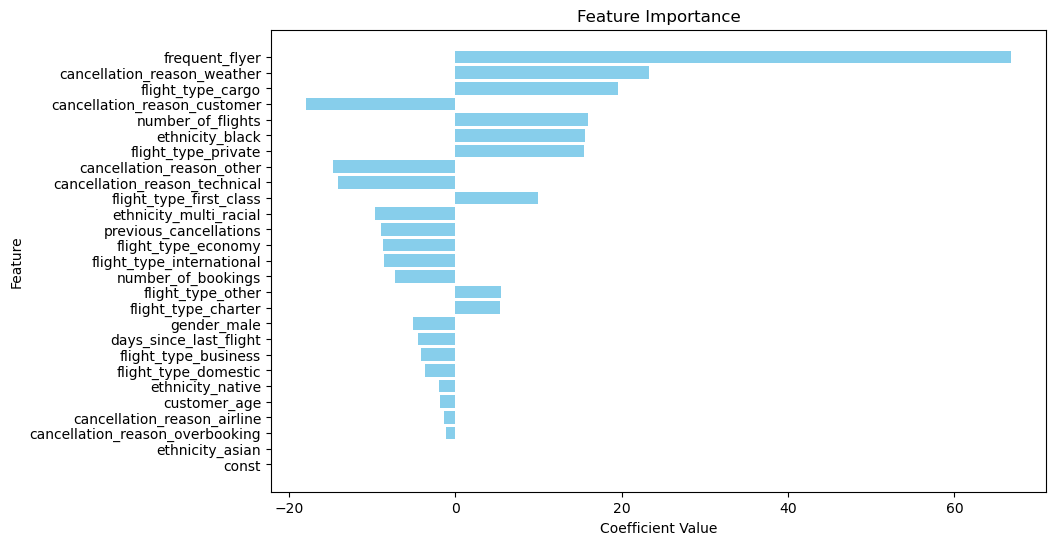

In [135]:

# Feature importance

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
}).sort_values(by='Importance', key=abs, ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()
